In [1]:
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, ttest_ind, t

# Mann Whitney

In [2]:
data1 = 5 * np.random.randn(1000) + 50
data2 = 5 * np.random.randn(1000) + 51

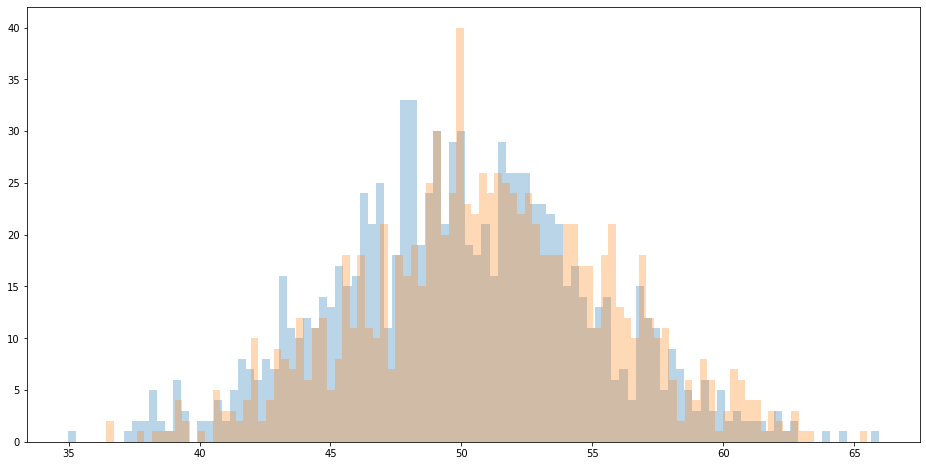

In [3]:
plt.figure(figsize=(16, 8))
plt.hist(data1, bins=100, alpha=0.3)
plt.hist(data2, bins=100, alpha=0.3)
plt.show()

In [6]:
stat, p = mannwhitneyu(data1, data2)
print(f'Statistics={stat}, p={p}')
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=437195.0, p=1.152698027798643e-06
Different distribution (reject H0)


In [7]:
num_tests = 10000

In [8]:
counter_acc = 0
stats_diff = []
for i in tqdm(range(num_tests)):
    data1 = 5 * np.random.randn(1000) + 50
    data2 = 5 * np.random.randn(1000) + 51
    stat, p = mannwhitneyu(data1, data2)
    counter_acc += p > alpha
    stats_diff.append(stat)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [9]:
counter_acc, num_tests - counter_acc

(70, 9930)

In [10]:
counter_acc = 0
stats_same = []
for i in tqdm(range(num_tests)):
    data1 = 5 * np.random.randn(1000) + 50
    data2 = 5 * np.random.randn(1000) + 50
    stat, p = mannwhitneyu(data1, data2)
    counter_acc += p > alpha
    stats_same.append(stat)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [11]:
counter_acc, num_tests - counter_acc

(9524, 476)

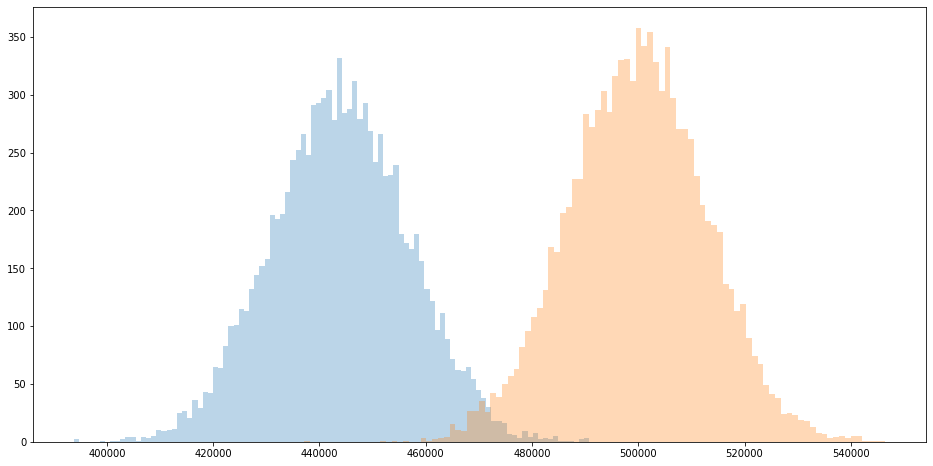

In [12]:
plt.figure(figsize=(16, 8))
plt.hist(stats_diff, bins=100, alpha=0.3)
plt.hist(stats_same, bins=100, alpha=0.3)
plt.show()

# Sequence probability ratio test

$$f_{\eta}(t) = \frac{b}{\eta}\left(\frac{t}{\eta}\right)^{b - 1}\exp\left(-\left(\frac{t}{\eta}\right)^{b}\right)$$

In [13]:
eta = 1.5
b = 1

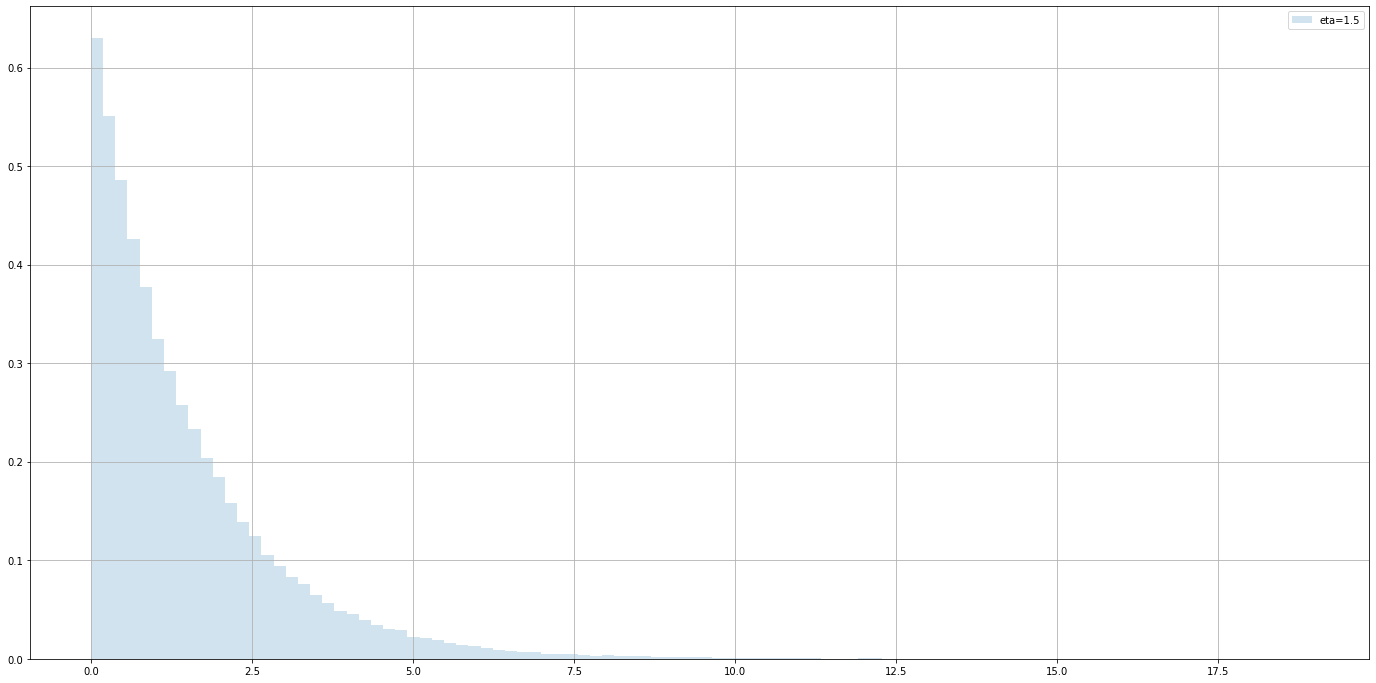

In [14]:
plt.figure(figsize=(24, 12))
plt.hist(eta * np.random.weibull(b, 100000), bins=100, density=True, alpha=0.2, label=f'eta={eta}')
plt.grid()
plt.legend()
plt.show()

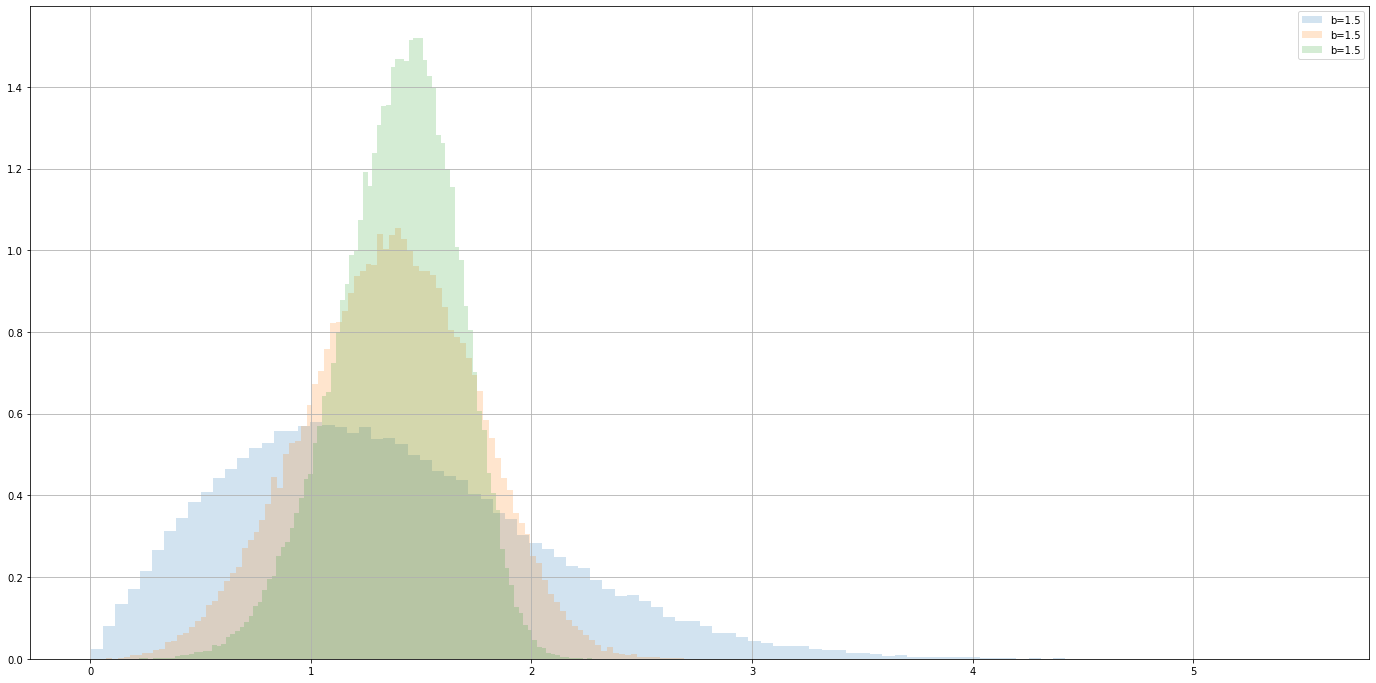

In [15]:
plt.figure(figsize=(24, 12))
for b in np.linspace(2, 6, 3):
    plt.hist(eta * np.random.weibull(b, 100000), bins=100, density=True, alpha=0.2, label=f'b={eta}')
plt.grid()
plt.legend()
plt.show()

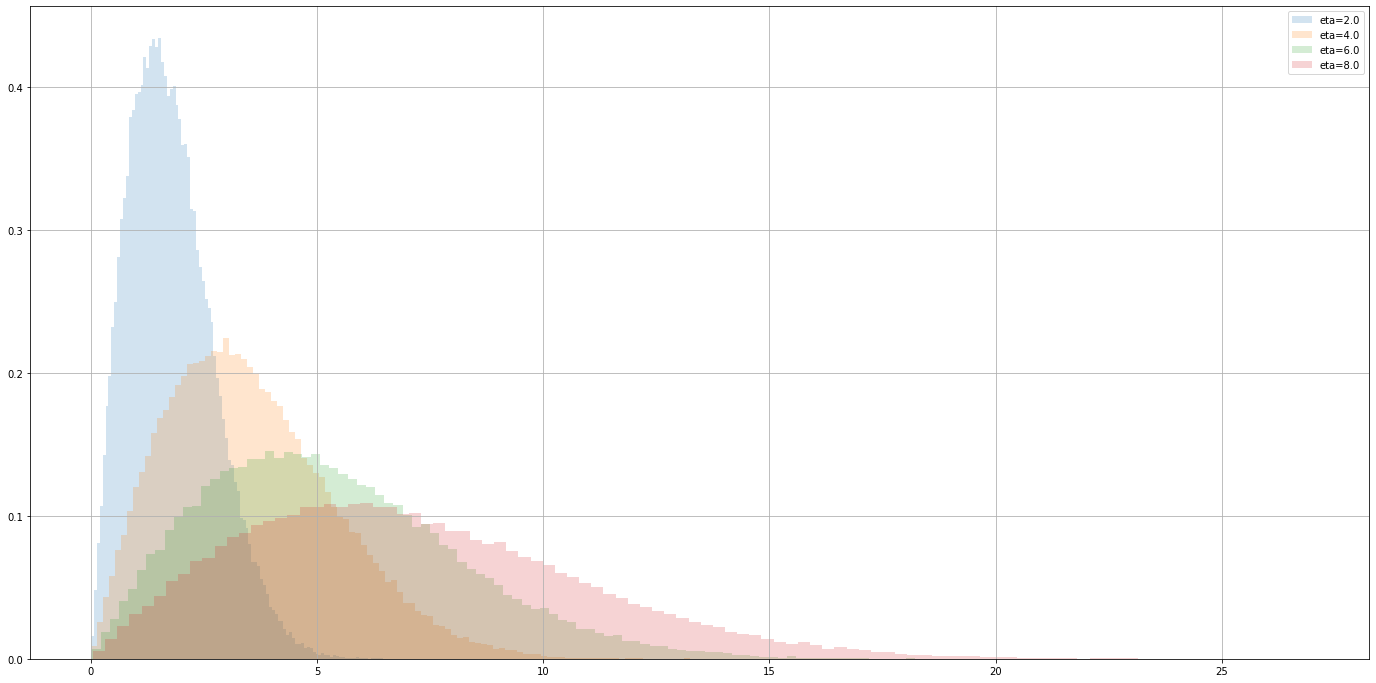

In [16]:
b = 2
plt.figure(figsize=(24, 12))
for eta in np.linspace(2, 8, 4):
    plt.hist(eta * np.random.weibull(b, 100000), bins=100, density=True, alpha=0.2, label=f'eta={eta}')
plt.grid()
plt.legend()
plt.show()

In [57]:
eta1 = 2
eta2 = 2.5
eta_real = 2.5
b = 2.25

alpha1 = 0.01
alpha2 = 0.01
n = 10000

In [58]:
data1 = np.random.weibull(b, size=n) * eta_real
L = []
U = []
V = [0]
for i in range(n):
    V.append(V[-1] + data1[i]**b)
    L.append((eta1 * eta2)**b / (eta2**b - eta1**b) * (np.log(alpha2 / (1 - alpha1)) + (i + 1) * b * np.log(eta2 / eta1)))
    U.append((eta1 * eta2)**b / (eta2**b - eta1**b) * (np.log((1 - alpha2) / alpha1) + (i + 1) * b * np.log(eta2 / eta1)))
    if V[-1] < L[-1]:
        counter_acc += 1
        break
    if V[-1] > U[-1]:
        break
V = V[1:]

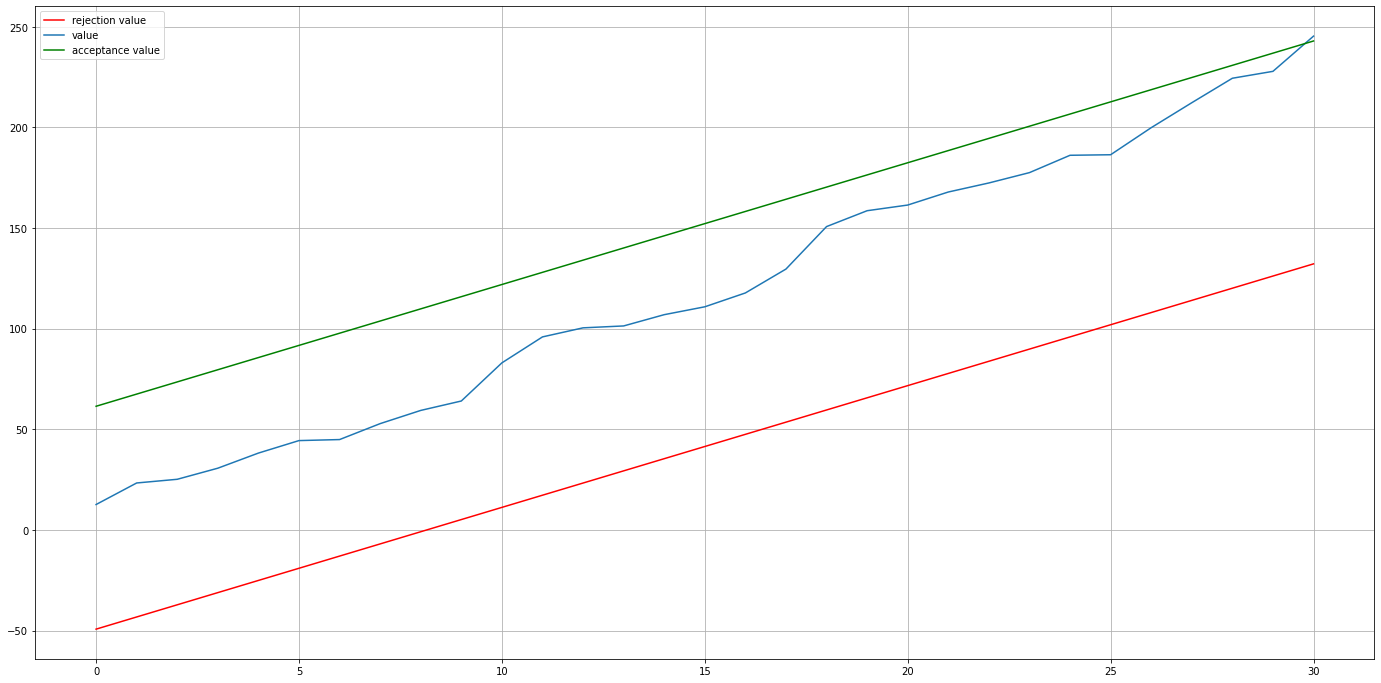

In [59]:
plt.figure(figsize=(24, 12))
plt.plot(L, label='rejection value', c='red')
plt.plot(V, label='value')
plt.plot(U, label='acceptance value', c='green')
plt.grid()
plt.legend()
plt.show()

In [60]:
counter_acc = 0
for j in tqdm(range(10000)):
    data1 = np.random.weibull(b, size=n) * eta1
    L = []
    U = []
    V = [0]
    for i in range(n):
        V.append(V[-1] + data1[i]**b)
        L.append((eta1 * eta2)**b / (eta2**b - eta1**b) * (np.log(alpha2 / (1 - alpha1)) + (i + 1) * b * np.log(eta2 / eta1)))
        U.append((eta1 * eta2)**b / (eta2**b - eta1**b) * (np.log((1 - alpha2) / alpha1) + (i + 1) * b * np.log(eta2 / eta1)))
        if V[-1] < L[-1]:
            counter_acc += 1
            break
        if V[-1] > U[-1]:
            break
    V = V[1:]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [61]:
counter_acc, 10000 - counter_acc

(9948, 52)

In [62]:
counter_acc = 0
for j in tqdm(range(10000)):
    data1 = np.random.weibull(b, size=n) * eta2
    L = []
    U = []
    V = [0]
    for i in range(n):
        V.append(V[-1] + data1[i]**b)
        L.append((eta1 * eta2)**b / (eta2**b - eta1**b) * (np.log(alpha2 / (1 - alpha1)) + (i + 1) * b * np.log(eta2 / eta1)))
        U.append((eta1 * eta2)**b / (eta2**b - eta1**b) * (np.log((1 - alpha2) / alpha1) + (i + 1) * b * np.log(eta2 / eta1)))
        if V[-1] < L[-1]:
            counter_acc += 1
            break
        if V[-1] > U[-1]:
            break
    V = V[1:]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [63]:
counter_acc, 10000 - counter_acc

(88, 9912)

# Bootstrap

In [64]:
data = np.random.beta(2, 2, 1000)

In [65]:
mean = 2
std = np.sqrt(2 * 2 / (2 + 2)**2 / (2 + 2 + 1))

In [66]:
mean, std

(2, 0.22360679774997896)

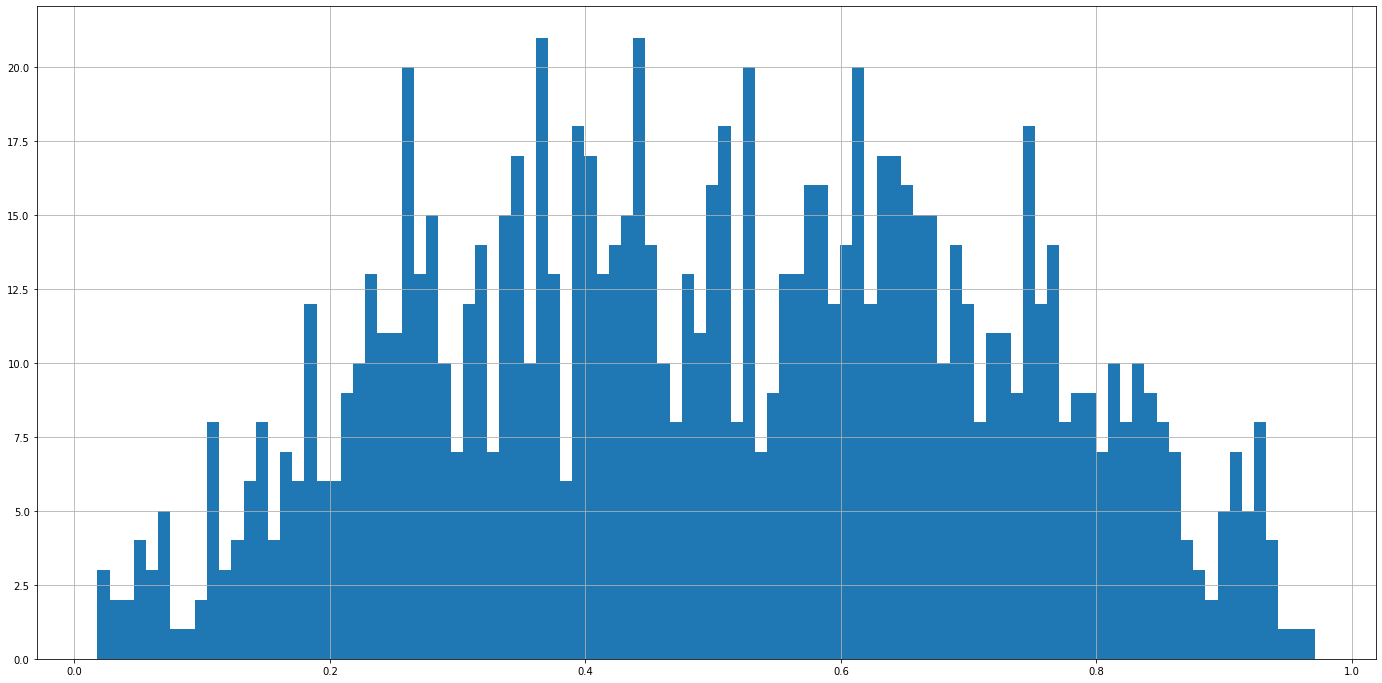

In [67]:
plt.figure(figsize=(24, 12))
plt.hist(data, bins=100)
plt.grid()
plt.show()

In [68]:
data.mean()

0.5046672194191273

In [69]:
means = []
for i in range(10000):
    means.append(np.random.choice(data, size=300, replace=True).mean())

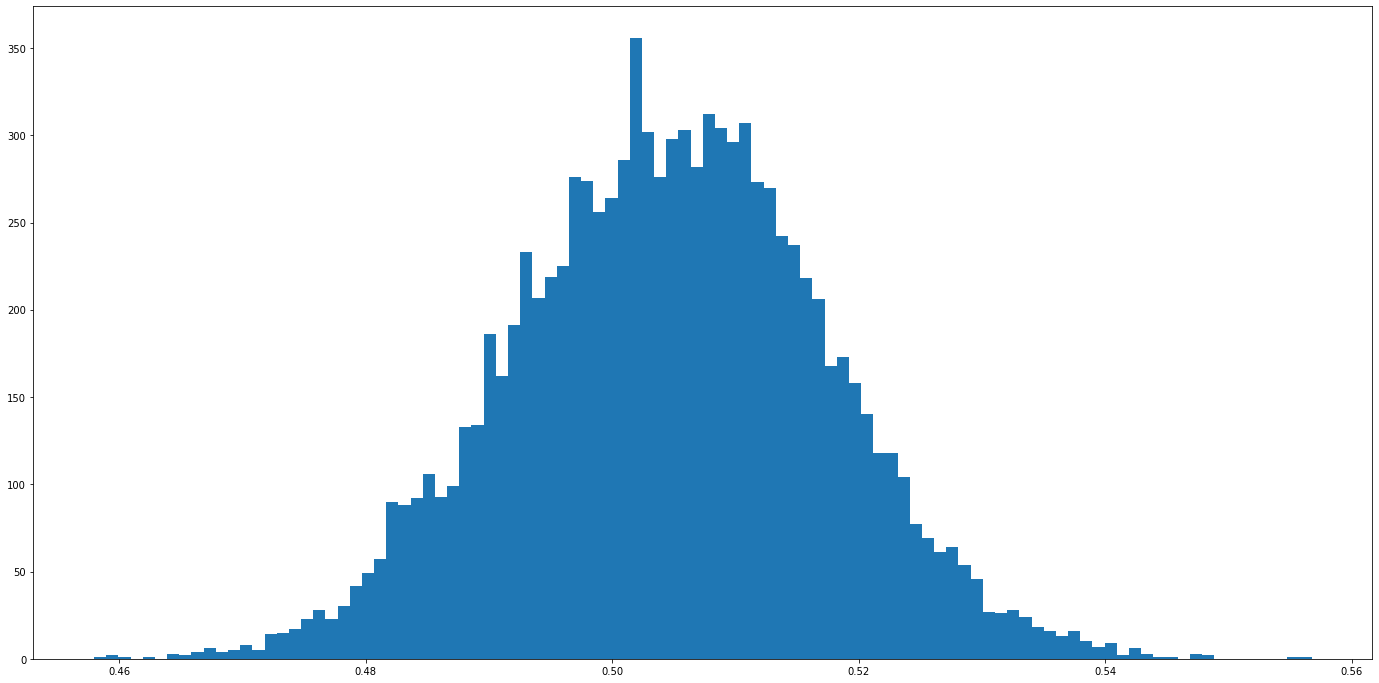

In [70]:
plt.figure(figsize=(24, 12))
plt.hist(means, bins=100)
plt.show()

In [71]:
np.percentile(means, 2.5), np.percentile(means, 97.5)

(0.4799846202639616, 0.5292987105116591)

In [72]:
data.std()

0.2191857234895657

In [73]:
stds = []
for i in range(10000):
    stds.append(np.std(np.random.choice(data, size=300, replace=True)))

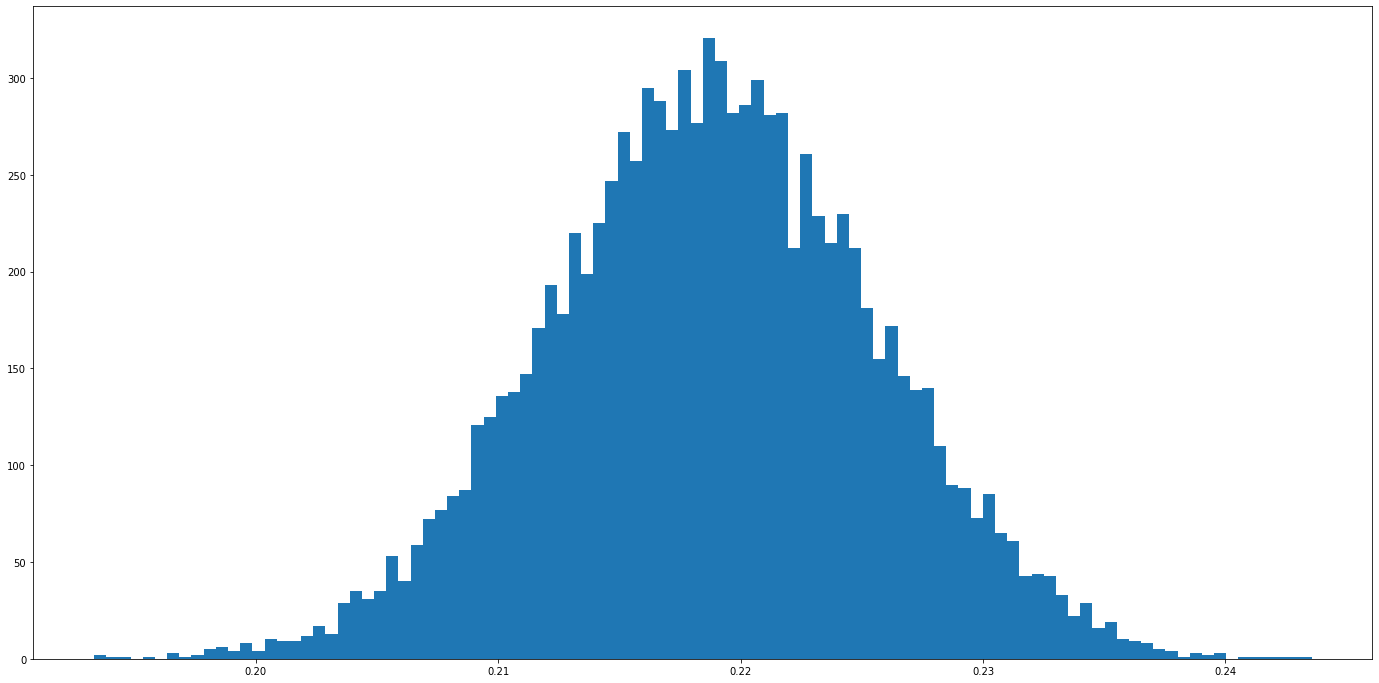

In [74]:
plt.figure(figsize=(24, 12))
plt.hist(stds, bins=100)
plt.show()

In [75]:
np.percentile(stds, 2.5), np.percentile(stds, 97.5)

(0.2055195245941385, 0.23204843319094806)

In [76]:
data1 = 5 * np.random.randn(10000) + 50
data2 = 5 * np.random.randn(10000) + 51

In [77]:
counter_acc = 0
stats_diff, stats_same = [], []
for i in tqdm(range(num_tests)):
    d1 = np.random.choice(data1, size=500, replace=True)
    d2 = np.random.choice(data2, size=500, replace=True)
    stat, p = mannwhitneyu(d1, d2)
    stats_diff.append(stat)
    counter_acc += p > alpha
    d1 = np.random.choice(data1, size=500, replace=True)
    d2 = np.random.choice(data1, size=500, replace=True)
    stat, p = mannwhitneyu(d1, d2)
    stats_same.append(stat)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [78]:
counter_acc, num_tests - counter_acc

(1157, 8843)

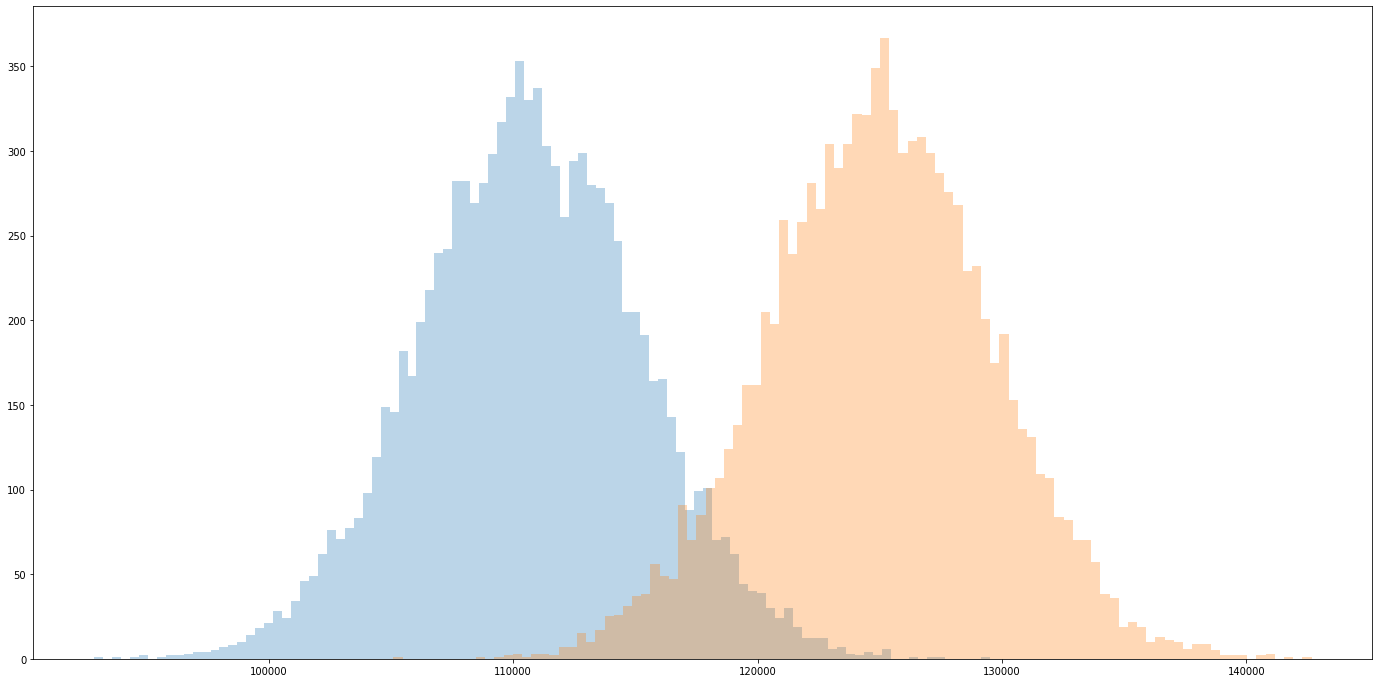

In [79]:
plt.figure(figsize=(24, 12))
plt.hist(stats_diff, bins=100, alpha=0.3)
plt.hist(stats_same, bins=100, alpha=0.3)
plt.show()

In [80]:
counter_acc = 0
stats_diff, stats_same = [], []
for i in tqdm(range(num_tests)):
    d1 = np.random.choice(data1, size=500, replace=True)
    d2 = np.random.choice(data2, size=500, replace=True)
    stat, p = ttest_ind(d1, d2)
    stats_diff.append(stat)
    counter_acc += p > alpha
    d1 = np.random.choice(data1, size=500, replace=True)
    d2 = np.random.choice(data1, size=500, replace=True)
    stat, p = ttest_ind(d1, d2)
    stats_same.append(stat)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [81]:
counter_acc

1214

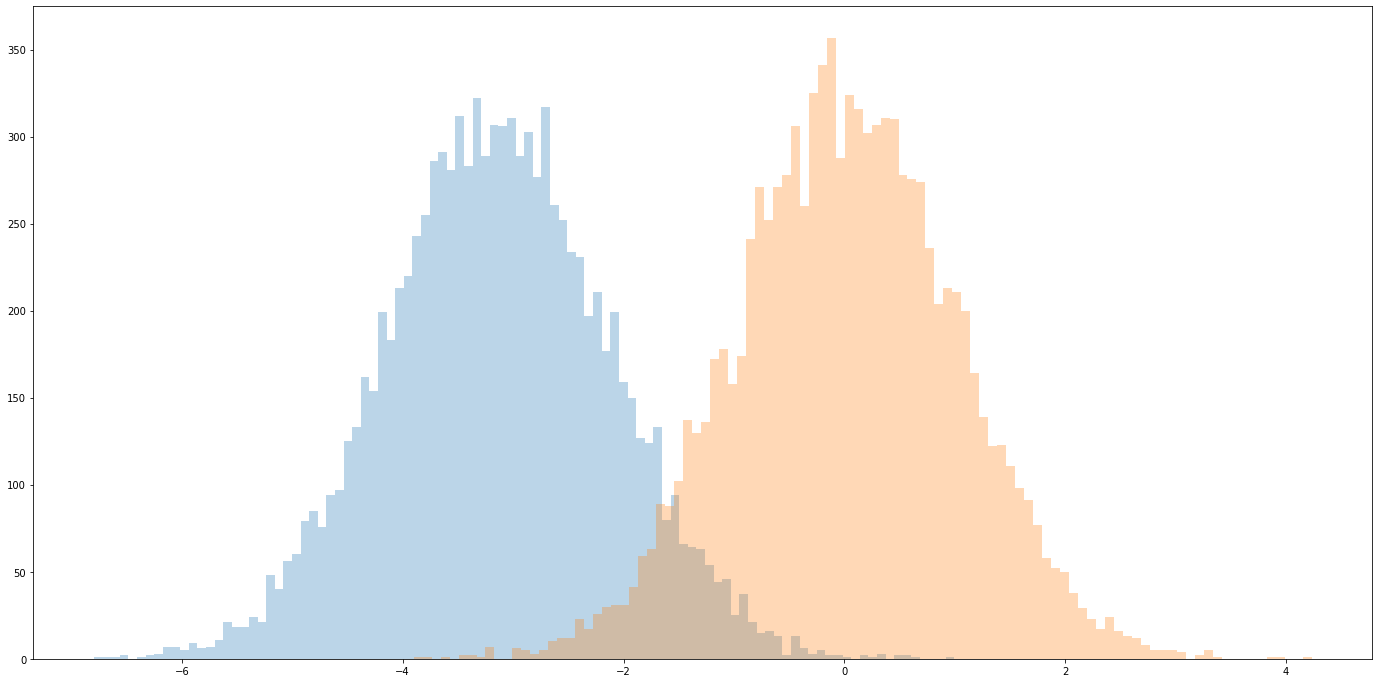

In [82]:
plt.figure(figsize=(24, 12))
plt.hist(stats_diff, bins=100, alpha=0.3)
plt.hist(stats_same, bins=100, alpha=0.3)
plt.show()

In [83]:
data1 = np.random.normal(100, 10, 100000)
data2 = np.random.exponential(100, 100000)

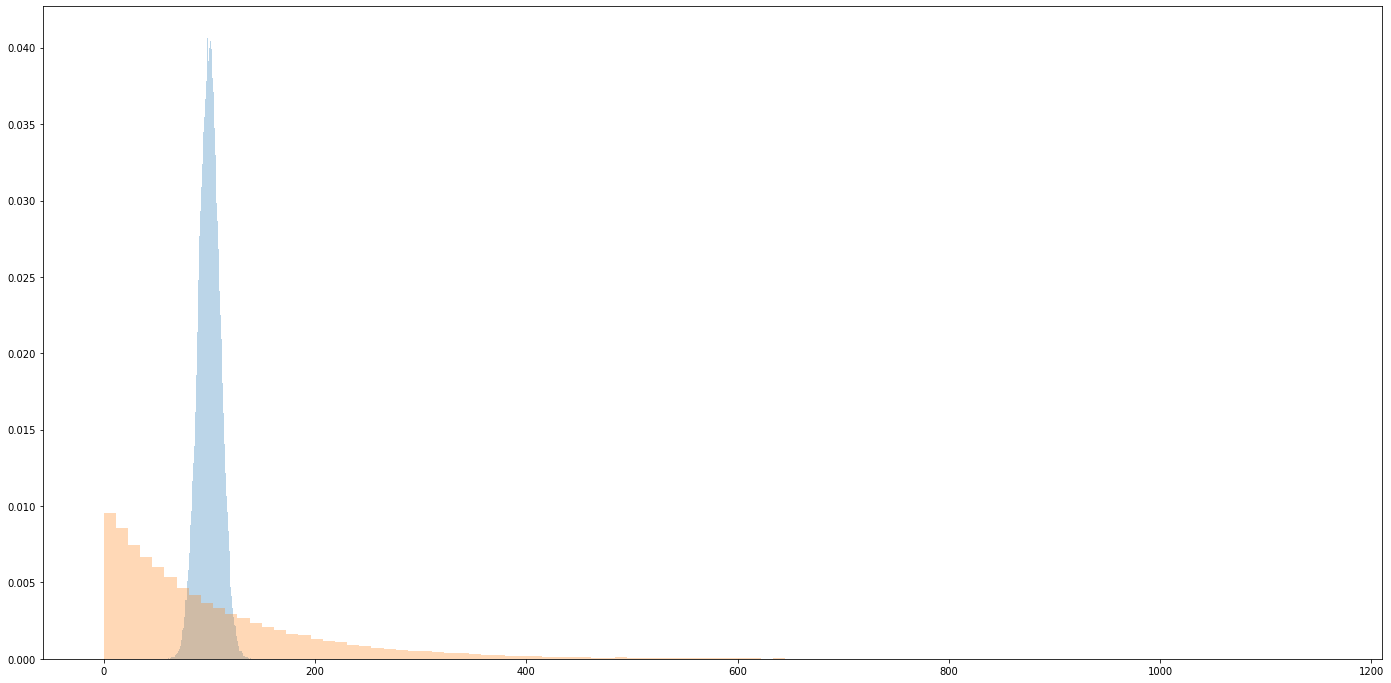

In [84]:
plt.figure(figsize=(24, 12))
plt.hist(data1, bins=100, alpha=0.3, density=True)
plt.hist(data2, bins=100, alpha=0.3, density=True)
plt.show()

In [86]:
stats = []
mu0 = 100
for i in tqdm(range(num_tests)):
    d2 = np.random.exponential(mu0, size=10)
    stats.append(np.sqrt(d2.shape[0]) * (d2.mean() - mu0) / d2.std())
    
stats_2 = []
for i in tqdm(range(num_tests)):
    d2 = np.random.normal(mu0, 100, size=10)
    stats_2.append(np.sqrt(d2.shape[0]) * (d2.mean() - mu0) / d2.std())

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

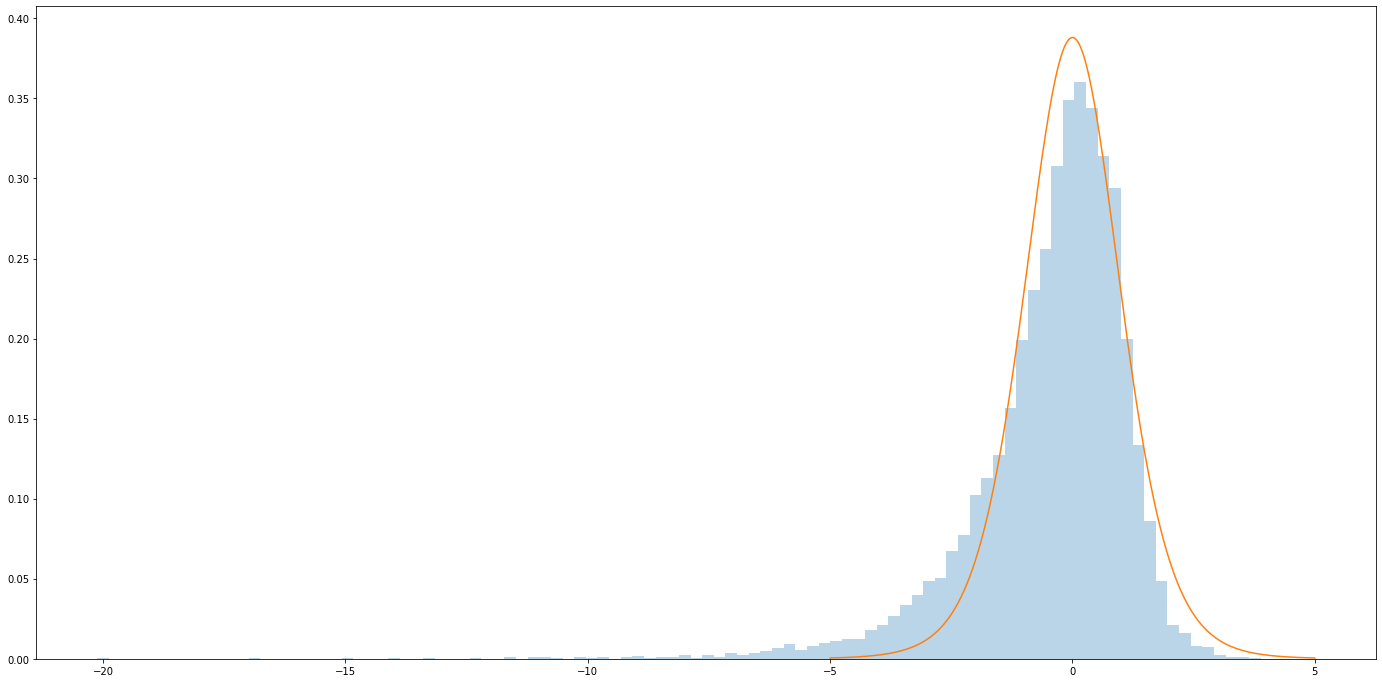

In [89]:
plt.figure(figsize=(24, 12))
plt.hist(stats, bins=100, alpha=0.3, density=True)
# plt.hist(stats_2, bins=100, alpha=0.3, density=True)
plt.plot(np.linspace(-5, 5, 1000), t.pdf(np.linspace(-5, 5, 1000), df=9))
plt.show()